## CFP: Detecting Wheelchair Chair User Intention using Algorithms

In [1]:
# Import libraries
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import GetAccelerationArr,ShowModelPerformance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

## Part I: Data Pre-processing
*First of all, we need to load all the data stored in seperate csv files and preprocess the data*

In [2]:
fileNames_train = ['TurnLeft1.csv','TurnLeft2.csv','TurnLeft3.csv','RightTurn1.csv','RightTurn2.csv','RightTurn3.csv','Nov_11_16_straight1_processed data.csv','Nov_11_16_straight2_processed data.csv','Nov_11_16_straight3_processed data.csv']
fileNames_test = ['dataset.csv']

*In addition to velocity, we also calculated the acceleration using five-point endpoint numerical differentiation which achieves a fourth order of accuracy*
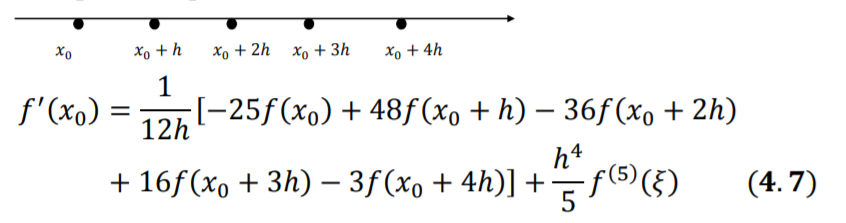
*Replace the h with -h will give a backward scheme, and the x in the formula correspons to time in our case*

In [3]:
def ExtractData(fileNames):
    x_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for filename in fileNames:
        dataset = pd.read_csv('./Matlab Read IOS Sensor/pre-processed data/'+filename)
        newarr = GetAccelerationArr(dataset['Angular Velocity Z(Left Wheel)'].values,0.1)
        dataset['Angular Acceleration Z(Left Wheel)']  = pd.Series(newarr)
        newarr = GetAccelerationArr(dataset['Angular Velocity Z(Right Wheel)'].values,0.1)
        dataset['Angular Acceleration Z(Right Wheel)']  = pd.Series(newarr)
        dataset = dataset[dataset['Angular Acceleration Z(Left Wheel)'].notnull()]
        x_train_temp = dataset.drop('Intention',axis = 1)
        y_train_temp = dataset['Intention']
        x_train_temp['Difference in Velocity'] = x_train_temp['Angular Velocity Z(Left Wheel)'] - x_train_temp['Angular Velocity Z(Right Wheel)']
        x_train_temp['Difference in Acceleration'] = x_train_temp['Angular Acceleration Z(Left Wheel)'] - x_train_temp['Angular Acceleration Z(Right Wheel)']
        x_train = pd.concat([x_train,x_train_temp])
        y_train = pd.concat([y_train,y_train_temp])
    return x_train,y_train

*Let's see what the training data looks like*

In [15]:
x_train,y_train = ExtractData(fileNames_train)
x_train.describe()


,Angular Velocity Z(Left Wheel),Angular Velocity Z(Right Wheel),Angular Acceleration Z(Left Wheel),Angular Acceleration Z(Right Wheel),Difference in Velocity,Difference in Acceleration
4,2.1004,2.3747,4.852333,3.986917,-0.2743,0.865417
5,2.4964,2.6356,2.733583,1.463000,-0.1392,1.270583
6,2.6509,2.7494,-0.386667,0.282000,-0.0985,-0.668667
7,2.5949,2.8443,-0.925667,1.777083,-0.2494,-2.702750
8,2.8128,2.9150,6.296667,0.234583,-0.1022,6.062083


In [16]:
x_train.head()

,Angular Velocity Z(Left Wheel),Angular Velocity Z(Right Wheel),Angular Acceleration Z(Left Wheel),Angular Acceleration Z(Right Wheel),Difference in Velocity,Difference in Acceleration
4,2.1004,2.3747,4.852333,3.986917,-0.2743,0.865417
5,2.4964,2.6356,2.733583,1.463000,-0.1392,1.270583
6,2.6509,2.7494,-0.386667,0.282000,-0.0985,-0.668667
7,2.5949,2.8443,-0.925667,1.777083,-0.2494,-2.702750
8,2.8128,2.9150,6.296667,0.234583,-0.1022,6.062083


In [5]:
x_test,y_test = ExtractData(fileNames_test)

In [6]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## Part II: Compare the Performance of Different Models
*In this section, we test the performance of **Logistic Regression**, **Extra Tree**, **Naive Bayes** and **Random Forest***

In [7]:
model = LogisticRegression(multi_class='multinomial',solver='lbfgs')
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Training error of  Logistic Regression  classifier is: 0.957351290684624
Test error of Naive Bayes  Logistic Regression  is: 0.968
The predicted labels are:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

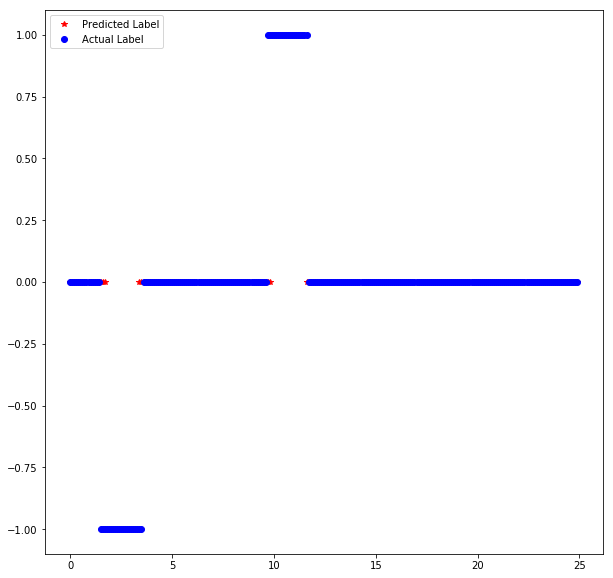

In [8]:
ShowModelPerformance(x_test,y_test,x_train,y_train,model,"Logistic Regression")

In [9]:
model = ExtraTreesClassifier();
model.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Training error of  Extra Trees  classifier is: 1.0
Test error of Naive Bayes  Extra Trees  is: 0.976
The predicted labels are:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

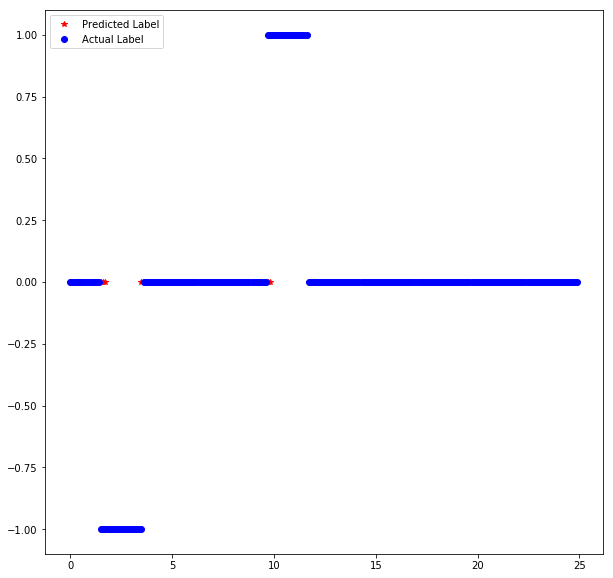

In [10]:
ShowModelPerformance(x_test,y_test,x_train,y_train,model,"Extra Trees")

In [11]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None)

Training error of  Naive Bayes  classifier is: 0.9674523007856342
Test error of Naive Bayes  Naive Bayes  is: 0.984
The predicted labels are:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

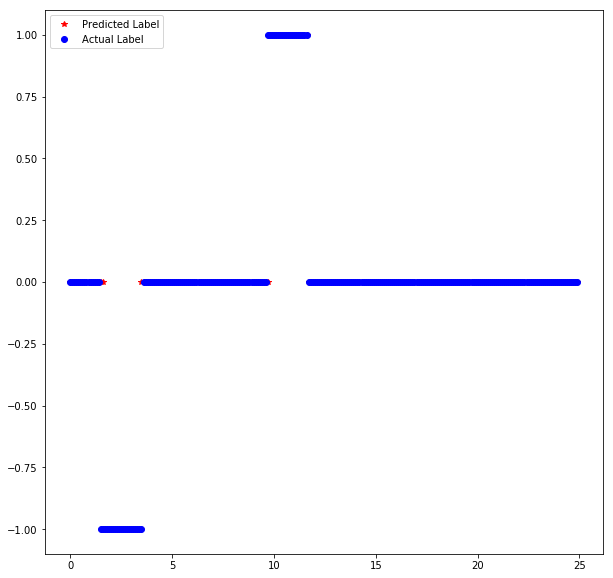

In [12]:
ShowModelPerformance(x_test,y_test,x_train,y_train,model,"Naive Bayes")

In [13]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Training error of  Random Forest  classifier is: 0.9977553310886644
Test error of Naive Bayes  Random Forest  is: 0.976
The predicted labels are:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

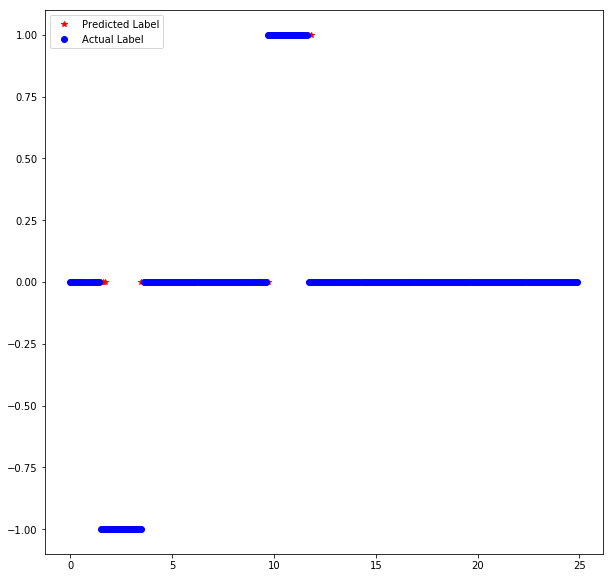

In [14]:
ShowModelPerformance(x_test,y_test,x_train,y_train,model,"Random Forest")

1. **In conclusion, Naive Bayes slightly perfroms better than the others. The accuracy of detecting user intention is quite high, approaching 97-98%.**
2. **All the incorrect prediction happens during the action transition state, which means our algorighm takes roughly 0.2s to predict the correct outcome.**